In [1]:
import pandas_datareader as pdr
import datetime as dt
import pandas as pd
import numpy as np

In [2]:
start = dt.datetime(2010, 1, 1)
end = dt.datetime(2020, 12, 31)

data = pdr.get_data_yahoo("^GSPC", start, end)

In [3]:
data['Log returns'] = np.log(data['Adj Close']/data['Adj Close'].shift())

In [4]:
data['Adj Close'].iloc[-1]/data['Adj Close'].iloc[0]

3.3151838063303445

In [5]:
data['Log returns'].sum()

1.1985130689575154

In [6]:
np.exp(data['Log returns'].sum())

3.315183806330324

In [7]:
data['Normalize'] = data['Adj Close']/data['Adj Close'].iloc[0]

In [8]:
data['Exp sum'] = data['Log returns'].cumsum().apply(np.exp)

In [9]:
data[['Normalize', 'Exp sum']].tail()

,Normalize,Exp sum
Date,,
2020-12-24,3.268396,3.268396
2020-12-28,3.296905,3.296905
2020-12-29,3.289561,3.289561
2020-12-30,3.293974,3.293974
2020-12-31,3.315184,3.315184


In [10]:
volatility = data['Log returns'].std()*(252**0.5)
volatility

0.1755998001983418

### Project
- Visualize the volatility

#### Step 1
- Import matplotlib

In [11]:
import matplotlib.pyplot as plt
%matplotlib notebook

#### Step 2
- Get the volatility as a string

In [12]:
str_vol = str(round(volatility, 3)*100)

#### Step 3
- Visualize it in a histogram

<IPython.core.display.Javascript object>


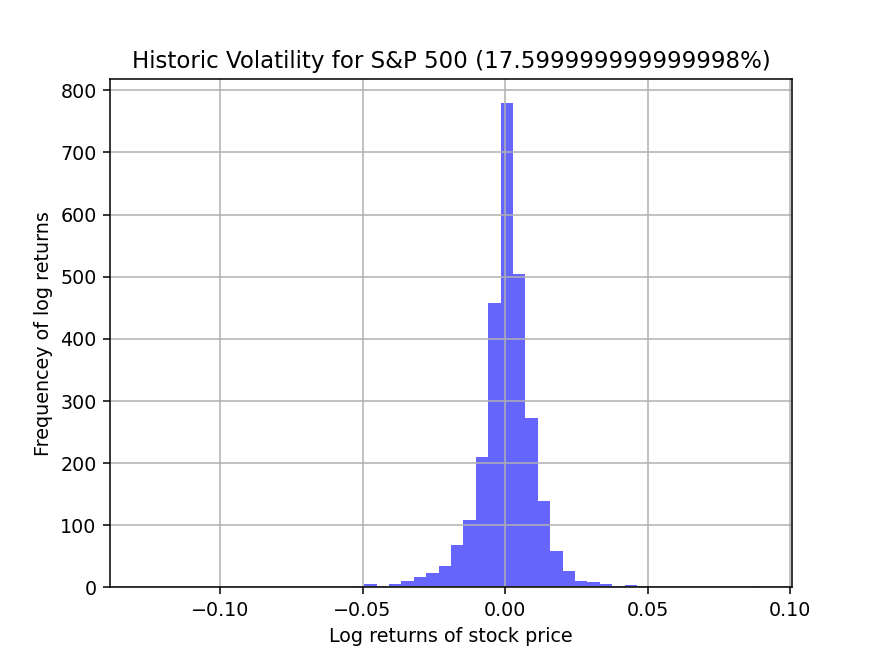

Text(0.5, 1.0, 'Historic Volatility for S&P 500 (17.599999999999998%)')

In [22]:
fig, ax = plt.subplots()
data['Log returns'].hist(ax=ax, bins=50, alpha=0.6, color='b')
ax.set_xlabel("Log returns of stock price")
ax.set_ylabel("Frequencey of log returns")
ax.set_title("Historic Volatility for S&P 500 (" + str_vol +"%)")

In [23]:
np.log(1.2)+np.log(1.15)+np.log(1.1)+np.log(1.3)

0.6797579434409292

In [24]:
np.exp(0.6797579434409292)

1.9734